 ### Introducing to neural network classifications with tensorflow

 in this notebook we're going to learn how to write neural networks for classification problems.

 A classification Problem is where you try to classify something as one thing or another.

 a few types of classification problem:
 * Binary classification
 * Multi-class classification
 * Multi-label classification

## creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# make 1000 examples
n_samples = 1000

#create circles
X, y = make_circles(n_samples=n_samples, noise=0.03, random_state=42)

X.shape, y

((1000, 2),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
        0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 1, 

Our data is now hard to understand ... lets visualize it

In [2]:
import pandas as pd
circle = pd.DataFrame({'X0': X[:,0], 'X1': X[:,1],'label':y})
circle

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


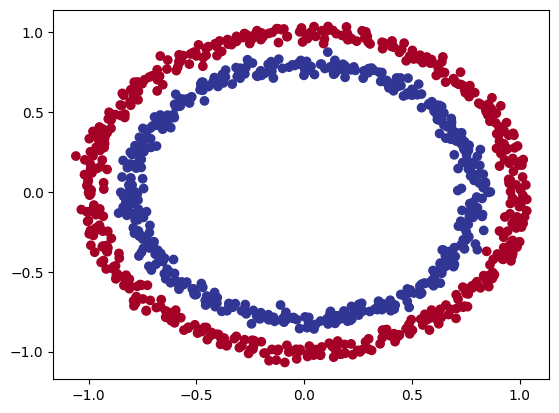

In [3]:
#visualize with the plot
import matplotlib.pyplot as plt
plt.scatter([X[:,0]], [X[:,1]], c=y, cmap=plt.cm.RdYlBu)
plt.show()## Building a neural network with tensorflowimport tensorflow as tf


see (Playground.tensorflow.org)[http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.36443&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false]

### Input and output shapes

In [4]:
# check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [5]:
# how many samples
len(X) , len(y)

(1000, 1000)

### steps in modeling

the steps in modelling with Tensorflow are typically:
1. create or import model
2. compile the model
3. fit the model
4. evaluate the model
5. tweak
6. evaluate...

In [6]:
import tensorflow as tf

In [7]:
# Set the random seed
tf.random.set_seed(42)

# create the model using the sequential API
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.SGD(),metrics=['accuracy'])# percent

model.fit(X,y, epochs=5)

Epoch 1/5


2024-04-02 15:01:14.955811: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-04-02 15:01:14.955850: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-04-02 15:01:14.955855: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-04-02 15:01:14.955878: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-02 15:01:14.955894: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-04-02 15:01:15.141949: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4854 - loss: 5.1967
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4739 - loss: 3.8996
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5069 - loss: 0.7787
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5104 - loss: 0.7132
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5071 - loss: 0.6991


In [8]:
# Set the random seed
tf.random.set_seed(42)

# create the model using the sequential API
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.SGD(),metrics=['accuracy'])# percent

model_1.fit(X,y, epochs=200)

Epoch 1/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4746 - loss: 5.3844
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4775 - loss: 4.2236
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5123 - loss: 0.7448
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5173 - loss: 0.7029
Epoch 5/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5171 - loss: 0.6944
Epoch 6/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5158 - loss: 0.6929
Epoch 7/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5158 - loss: 0.6931
Epoch 8/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5085 - loss: 0.6936
Epoch 9/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4904 - loss: 0.6940
Epoch 10/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4623 - loss: 0.6943
Epoch 11/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4409 - loss: 0.6945
Epoch 12/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy:

In [9]:
model_1.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4852 - loss: 0.6927


[0.6933518648147583, 0.4729999899864197]

Since we're working on a binary classification problem and our model is getting around 50% accuracy... it's a performing as if it's guessing.

so lets add extra layers.

In [10]:
# Set the random seed
tf.random.set_seed(42)

# create the model using the sequential API
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.SGD(),metrics=['accuracy'])# percent

model.fit(X,y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3879 - loss: 1.6884
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3812 - loss: 0.7088
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4218 - loss: 0.7021
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4607 - loss: 0.6961
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4972 - loss: 0.6905
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5343 - loss: 0.6851
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5916 - loss: 0.6795
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6626 - loss: 0.6739
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7359 - loss: 0.6677
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7815 - loss: 0.6620
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8388 - loss: 0.6565
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy

## Improve our model

1. creatinf a model - add more layers
2. compiling a model - choose different opt such as Adam
3. fit the model - more epochs

In [11]:
# Set the random seed
tf.random.set_seed(42)

# create the model using the sequential API
model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(100),# new
  tf.keras.layers.Dense(10),# new
    tf.keras.layers.Dense(1)
])

# compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.SGD(),metrics=['accuracy'])# percent

model_2.fit(X,y, epochs=100, verbose=0)

In [12]:
model_2.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4999 - loss: 0.6926


[0.6946889758110046, 0.4819999933242798]

# visualize

for that lets create a function (`plot_decision_boundary()`)

* take in a trained model, feutures (X) and labels (y)
* create a meshgrid of the different X values 
* make predictions 
* plot the prediction as well as a line between zones where each unique class falls


In [13]:
x_min,x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
y_min,y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1

In [14]:
import numpy as np

def plot_desision_boundary(model, X, y):
  """
  plot the decision boundary created by a model predicting on X.
  cs231 neural networks case study
  made with ml
  """
  # define the axis boundaries of the plot and create a meshgrid
  x_min,x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min,y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
  xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100))
  
#create X values(we're going to prediction on these)
  x_in = np.c_[xx.ravel(),yy.ravel()] # stack 2d arrays together
  
  # make predictions
  y_pred = model.predict(x_in)
  
  # check for multi-class
  if len(y_pred[0]) > 1 :
    print('multiclass')
    # we have to reshape our predictions
    y_pred = np.argmax(y_pred, axis=-1).reshape(xx.shape)
  else:
    print("binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
    
    #plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:,0], X[:,1], c=y,s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
binary classification


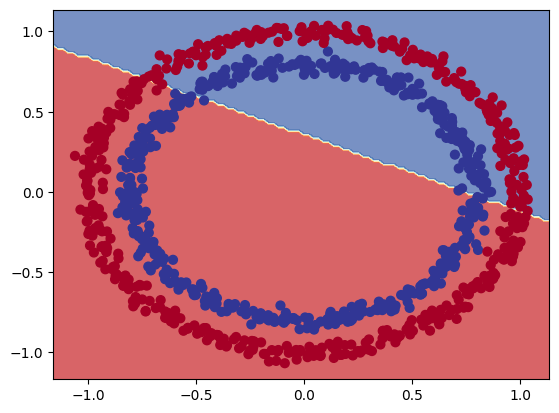

In [17]:
# check the predicctions our model
plot_desision_boundary(model_2, X, y)

### Non-linearity

In [18]:
# Set the random seed
tf.random.set_seed(42)

# create the model using the sequential API
model_5 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(3, activation='relu'),# new (linear - sigmoind)
  tf.keras.layers.Dense(4, activation='relu'),# new
 
])

# compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])# percent

history = model_5.fit(X,y, epochs=100)

Epoch 1/100


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 4)

### model activation

we need model activation (Sigmoid) for our output layer in binary crossentropy 

In [19]:
# Set the random seed
tf.random.set_seed(42)

# create the model using the sequential API
model_6 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(4, activation='relu'),# new (linear - sigmoind)
  tf.keras.layers.Dense(4, activation='relu'),# new
  tf.keras.layers.Dense(1, activation='sigmoid'),# new - multi is softmax
])

# compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])# percent

history = model_6.fit(X,y, epochs=130)

Epoch 1/130
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4830 - loss: 0.7095
Epoch 2/130
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4832 - loss: 0.6973
Epoch 3/130
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5244 - loss: 0.6901
Epoch 4/130
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5179 - loss: 0.6858
Epoch 5/130
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5222 - loss: 0.6830
Epoch 6/130
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5380 - loss: 0.6810
Epoch 7/130
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5428 - loss: 0.6791
Epoch 8/130
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5484 - loss: 0.6775
Epoch 9/130
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5555 - loss: 0.6761
Epoch 10/130
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5624 - loss: 0.6747
Epoch 11/130
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5667 - loss: 0.6734
Epoch 12/130
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
binary classification


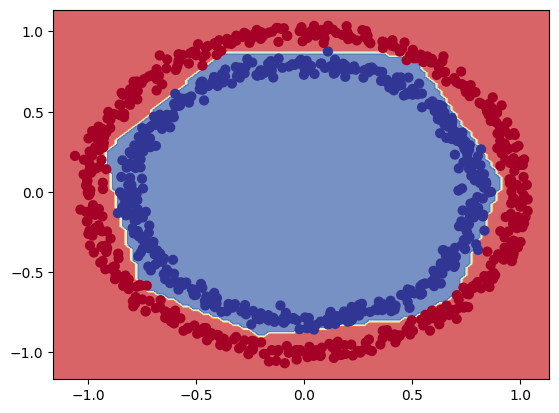

In [20]:
plot_desision_boundary(model_6, X, y)

**Note:** The combination of **linear (straight lines) and non-linear (non-straigh lines) functions** is one of the key fundamentals of neural networks.

In [21]:
# create a toy tensor (similar to our data)
A=tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

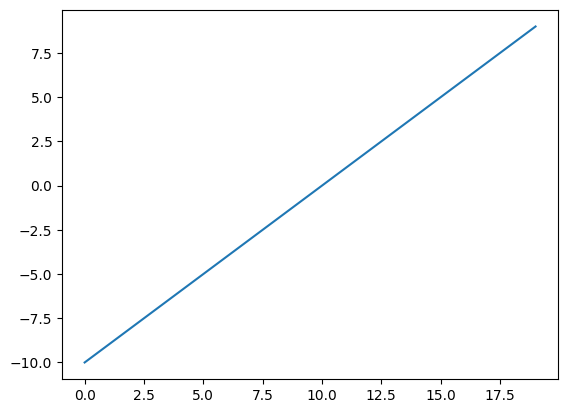

In [22]:
#visualize
plt.plot(A)
plt.show()

In [23]:
# lets starm by replicating sigmoid- sigmoid(x) = 1 / (1+ exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# use our sigmoid on our tensot
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.53978682e-05, 1.23394580e-04, 3.35350138e-04, 9.11051175e-04,
       2.47262325e-03, 6.69285096e-03, 1.79862101e-02, 4.74258736e-02,
       1.19202934e-01, 2.68941432e-01, 5.00000000e-01, 7.31058598e-01,
       8.80797148e-01, 9.52574134e-01, 9.82013762e-01, 9.93307173e-01,
       9.97527421e-01, 9.99089003e-01, 9.99664664e-01, 9.99876618e-01],
      dtype=float32)>

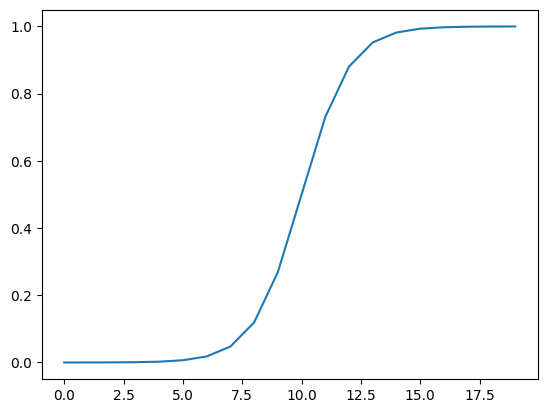

In [24]:
plt.plot(sigmoid(A))

In [25]:
# lets replicate relu function
def relu(x):
  return tf.maximum(0,x)

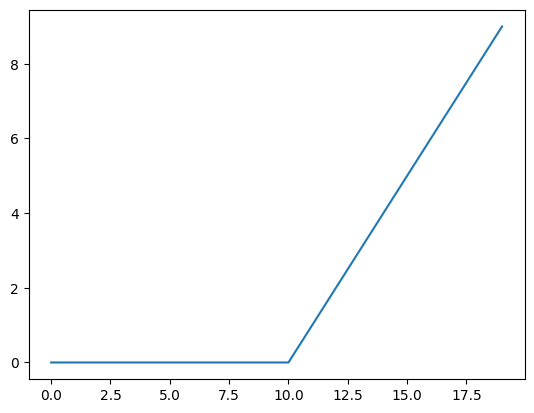

In [26]:
plt.plot(relu(A))

### Evaluating and improving our classificiation
ml-cheatsheet.readhedocs.io

so far we've training and testing on the same dataset ...
however, in machine learning this is basically a sin.
So lets create a training and test set.

In [27]:
# split into train and test sets
X_train,y_train = X[:800], y[:800]
X_test,y_test = X[800:], y[800:]



In [28]:
# Set the random seed
tf.random.set_seed(42)

# create the model using the sequential API
model_7 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(4, activation='relu'),# new (linear - sigmoind)
  tf.keras.layers.Dense(4, activation='relu'),# new
  tf.keras.layers.Dense(1, activation='sigmoid'),# new - multi is softmax
])

# compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])# percent

history = model_7.fit(X_train,y_train, epochs=130)

Epoch 1/130
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5057 - loss: 0.6981
Epoch 2/130
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5248 - loss: 0.6921
Epoch 3/130
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5750 - loss: 0.6887
Epoch 4/130
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5093 - loss: 0.6864
Epoch 5/130
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5115 - loss: 0.6848
Epoch 6/130
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5131 - loss: 0.6835
Epoch 7/130
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5182 - loss: 0.6824
Epoch 8/130
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5137 - loss: 0.6813
Epoch 9/130
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5168 - loss: 0.6803
Epoch 10/130
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5177 - loss: 0.6793
Epoch 11/130
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5182 - loss: 0.6783
Epoch 12/130
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accur

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
binary classification


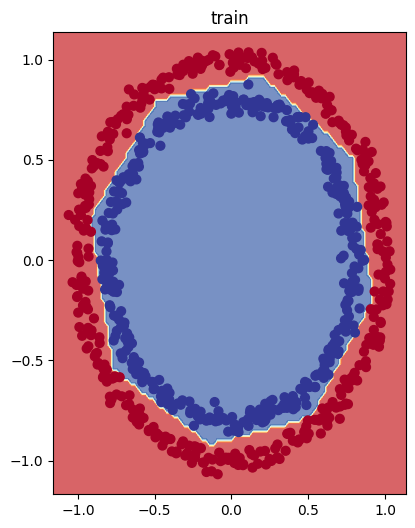

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
binary classification


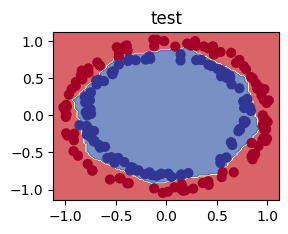

In [29]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.title('train')
plot_desision_boundary(model_7, X_train, y_train)
plt.subplot(2, 2, 2)
plt.title('test')
plot_desision_boundary(model_7, X_test, y_test)

## plot the loss (or training) curve


In [30]:
# convert the history object into a DataFrame
pd.DataFrame(history.history)


,accuracy,loss
0,0.51000,0.690823
1,0.54500,0.686577
2,0.56750,0.684124
3,0.52750,0.682475
4,0.52500,0.681252
...,...,...
125,0.99875,0.127471
126,0.99875,0.125596
127,0.99875,0.123751
128,0.99875,0.121945


Text(0.5, 1.0, 'model_8 loss curve')

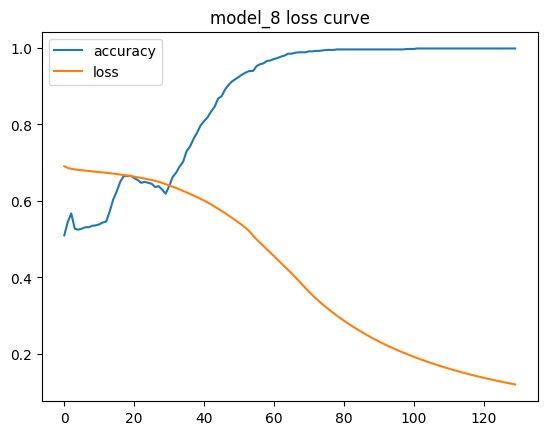

In [31]:
# plot the loss curve
pd.DataFrame(history.history).plot()
plt.title('model_8 loss curve')

it shows our model is improving

### finding the best learning rate

to find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use following steps:

* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your *while* its training.

* Another model (we could use the same one as above, but we're practicing building models here)

* A modified loss curves plot.

In [34]:
# Set the random seed
tf.random.set_seed(42)

# create the model using the sequential API
model_9 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(4, activation='relu'),# new (linear - sigmoind)
  tf.keras.layers.Dense(4, activation='relu'),# new
  tf.keras.layers.Dense(1, activation='sigmoid'),# new - multi is softmax
])

# compile the model
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])# percent

# create a learning rate callback

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))# new

history_9 = model_9.fit(X_train,y_train, epochs=100,callbacks=[lr_scheduler])        

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4976 - loss: 0.6894 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5051 - loss: 0.6893 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5160 - loss: 0.6892 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5161 - loss: 0.6891 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5063 - loss: 0.6890 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5169 - loss: 0.6889 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5136 - loss: 0.6887 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5096 - loss: 0.6886 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5132 - loss: 0.6885 - learni

<Axes: xlabel='epoch'>

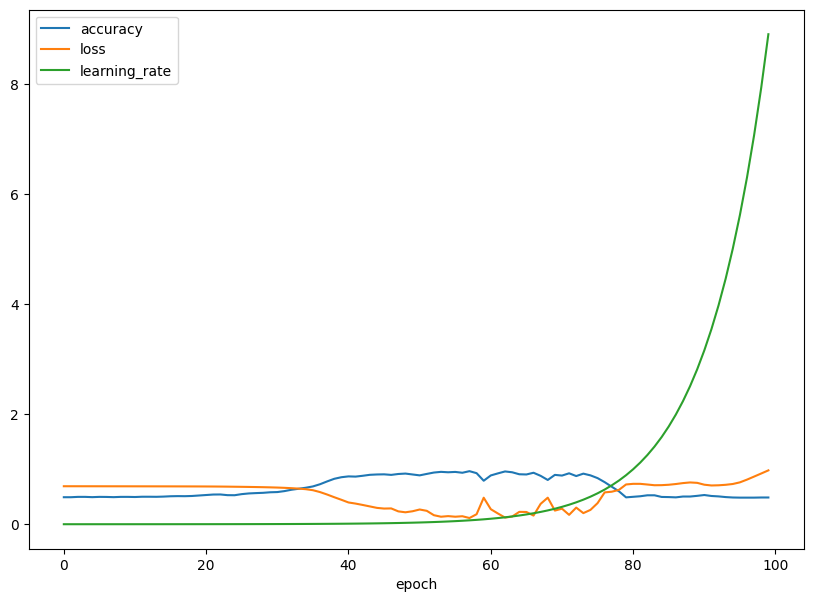

In [35]:
pd.DataFrame(history_9.history).plot(figsize=(10,7),xlabel='epoch')

Text(0, 0.5, 'Loss')

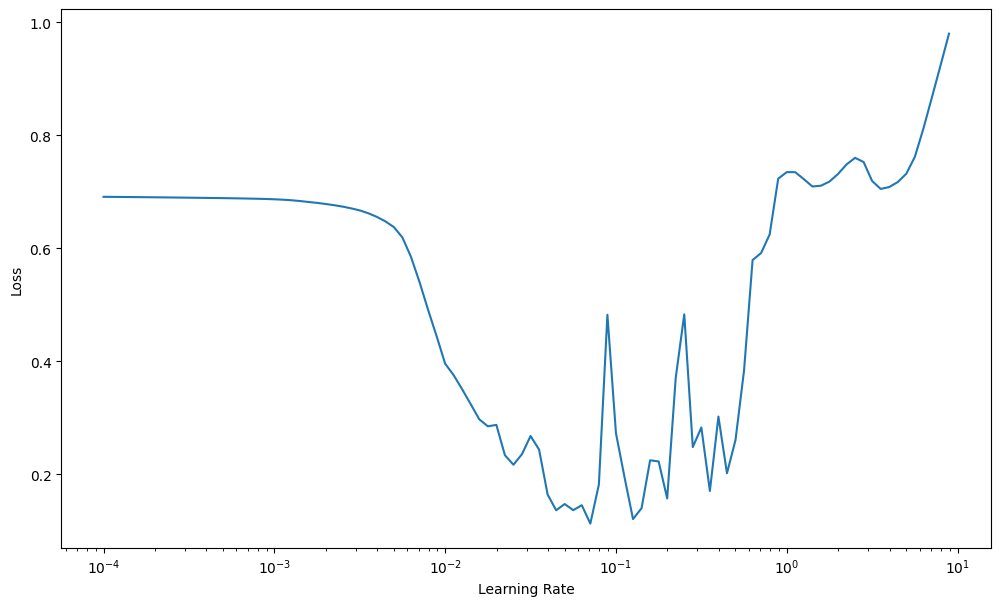

In [37]:
# plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(12,7))
plt.semilogx(lrs, history_9.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')

In [42]:
# example of other learning rates
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)